# Lab6 exercises 1


#### Exericse 2.1.1
The Wine dataset is a famous dataset available on the UCI ML repository. The data is the result of a chemical analysis of wines grown in the same region in Italy, but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. From these 13 constituents (features), your goal is to predict the target class (the cultivars).
You can either download the dataset from UCI, or you can get it directly from scikit-learn.

Load the dataset from sklearn, as described in Subsec. 1.2.1. Then, based on your X and y, answer the following questions:
- How many records are available?
- Are there missing values?
- How many elements does each class contain?

In [1]:
from sklearn.datasets import load_wine

dataset = load_wine()
X = dataset["data"]
y = dataset["target"]
feature_names = dataset["feature_names"]
target_names = dataset["target_names"]

X.shape, y.shape  # 178 samples, 13 features

((178, 13), (178,))

In [2]:
import numpy as np
X[np.isnan(X)]  # no missing values

array([], dtype=float64)

In [3]:
from collections import Counter
Counter(y)  # 3 classes, 59, 71, 48 samples

Counter({1: 71, 0: 59, 2: 48})

#### Exericse 1.2.2
Create a DecisionTreeClassifier object with the default configuration (i.e. without passing any parameters to the constructor). Train the classifier using your X and y.

In [4]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

#### Exericse 1.2.3
Now that you have created a tree, you can visualize it. Sklearn offers two functions to visualize decision trees. The first one, plot_tree(), plots the tree in a matplotlib-based, interactive window. An alternative way is using export_graphviz(). This function exports the tree as a DOT file. DOT is a language for describing graph (and, as a consequence, trees). From the DOT code, you can generate the resulting visual representation either using specific Python libraries, or by using any online tools (such as Webgraphviz). We recommend using the latter approach, where you paste the string returned by export_graphviz (which is the DOT file) directly into Webgraphviz.

[Text(0.5657894736842105, 0.9166666666666666, 'proline <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]\nclass = class_1'),
 Text(0.34210526315789475, 0.75, 'od280/od315_of_diluted_wines <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]\nclass = class_1'),
 Text(0.21052631578947367, 0.5833333333333334, 'hue <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]\nclass = class_2'),
 Text(0.10526315789473684, 0.4166666666666667, 'flavanoids <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]\nclass = class_2'),
 Text(0.05263157894736842, 0.25, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]\nclass = class_2'),
 Text(0.15789473684210525, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = class_1'),
 Text(0.3157894736842105, 0.4166666666666667, 'malic_acid <= 2.395\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]\nclass = class_1'),
 Text(0.2631578947368421, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]\nclass = class_1'),
 Text(0.3684210526315789, 0.25, 'g

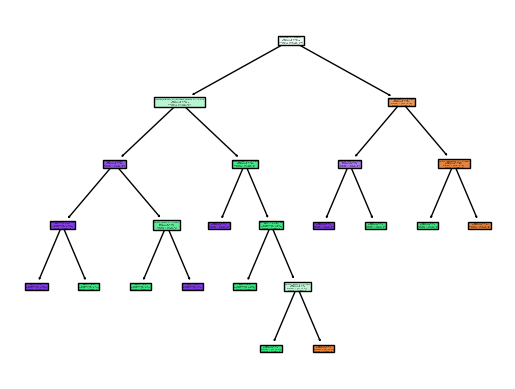

In [5]:
from sklearn.tree import plot_tree

plot_tree(clf, feature_names=feature_names, class_names=target_names, filled=True)

In [7]:
# import pydot
# from IPython.display import Image
# from sklearn.tree import export_graphviz

# dot_code = export_graphviz(clf, feature_names=feature_names)
# graph = pydot.graph_from_dot_data(dot_code)
# Image(graph[0].create_png())

#### Exericse 1.2.4
 Given the dataset X, you can get the predictions of the classifier (one for each entry in X) by calling the predict() of DecisionTreeClassifier. Then, use the accuracy_score() function (which you can import from sklearn.metrics) to compute the accuracy between two lists of values (y_true, the list of “correct” labels, and y_pred, the list of predictions made by the classifier). Since you already have both these lists (y for the ground truth, and the result of the predict() method for the prediction), you can already compute the accuracy of your classifier. What result do you get? Does this result seem particularly high/low? Why do you think that is?

In [9]:
from sklearn.metrics import accuracy_score

accuracy_score(y, clf.predict(X))

# 100% accuracy on training data

1.0

#### Exericse 1.2.5
Now, we can split our dataset into a training set and a test set. We will use the training set to train a model, and to assess its performance with the test set. Sklearn offers the train_test_split() function to split any number of arrays (all having the same length on the first dimension) into two sets. You can refer to the official documentation to understand how it can be used. You can use an 80/20 train/testsplit.

If used correctly, you will get 4arrays: X_train, X_test, y_train, y_test.

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [39]:
c = Counter(y)
print("base dataset division")
for i in [0,1,2]:
    print(i, c[i]/len(y))

c = Counter(y_train)
print("train division")
for i in [0,1,2]:
    print(i, c[i]/len(y_train))

c = Counter(y_test)    
print("test division")
for i in [0,1,2]:
    print(i, c[i]/len(y_test))

base dataset division
0 0.33146067415730335
1 0.398876404494382
2 0.2696629213483146
train division
0 0.33098591549295775
1 0.4014084507042254
2 0.2676056338028169
test division
0 0.3333333333333333
1 0.3888888888888889
2 0.2777777777777778


#### Exericse 1.2.6
Now, train a new model using (X_train, y_train). Then, compute the accuracy with (X_test, y_test). How does this value compare to the previously computed one? Is this a more reasonable value? Why? This should give you a good idea as to why training and testing on the same dataset re- turns meaningless results. You can also compute other metrics (e.g. precision, recall, F1 score) using the respective functions (precision_score, recall_score, f1_score). Note that, since these three metrics are all based on a single class, you can either compute the value for a single class, aggregate the results into a single value, or receive the results for all three classes. Check the average param- eter on the documentation to learn more about this. You can also use the classification_report function, which returns various metrics (including the previously mentioned ones) for each of the classes of the problem.

In [44]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

0.9166666666666666